Here we will try to cluster breast cancer data, in order to explore the possibility of distinguishing malignant cases from benign cases. In order to better visualize the results, we will first perform a t-Distributed Stochastic Neighbr Embedding (t-sne) decomposition and use the two-dimensional embeddings as features

In [1]:
# Step 1: Importing libraries and data
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
np.random.seed(123456)
bc= load_breast_cancer()

In the next step, we will instantiate t-SNE and transform our data. We will plot the data in order to visually inspect and examine the data structure.

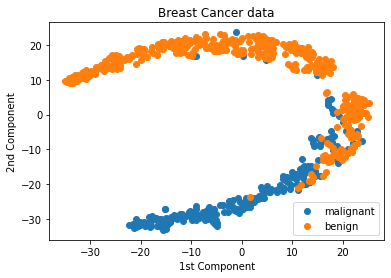

In [2]:
#  instantiate t-SNE 
tsne = TSNE()
# transform our data.
data = tsne.fit_transform(bc.data)
reds = bc.target == 0
blues = bc.target == 1
# plot the data in order to visually inspect and examine the data structure.
plt.scatter(data[reds, 0], data[reds, 1], label='malignant')
plt.scatter(data[blues, 0], data[blues, 1], label='benign')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.title('Breast Cancer data')
plt.legend()


We observe 2 distinct areas. The area populated by the blue points denotes embedding values that imply a high risk that the tumor is malignant.

As we have identified that there exists some structure in the data, we will try to use K-means clustering in order to model it. 

By intuition, we assume that two clusters would suffice as we wtry to separate 2 distinct regins and we know that there are 2 classes in the dataset.

Nonetheless we will also experiment with four and six clusters as they might provide more insigtht on the data. We will measure the percentage of each class assigned to each clster in order to gauge their quality. We do this by populating the classified dictionary. 

Each key corresponds to a cluster. Each key also points to a secondary disctionary where the number of malignant and bening cases are recordied for the specific cluster.

Furthermore, we plot the cluster assignments as we want to see how the data is distributed among the clusters.

<ipython-input-3-869e75770a51>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(1, 3, clusters/2)


----------------------------------------
Cluster 0. Malignant percentage:  {'m': 6, 'b': 260} 0.023
Cluster 1. Malignant percentage:  {'m': 206, 'b': 97} 0.680
0.4180405086934436
0.5092928


<ipython-input-3-869e75770a51>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(1, 3, clusters/2)


----------------------------------------
Cluster 0. Malignant percentage:  {'m': 134, 'b': 1} 0.993
Cluster 1. Malignant percentage:  {'m': 2, 'b': 125} 0.016
Cluster 2. Malignant percentage:  {'m': 72, 'b': 96} 0.429
Cluster 3. Malignant percentage:  {'m': 4, 'b': 135} 0.029
0.603292411781893
0.57638943


<ipython-input-3-869e75770a51>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(1, 3, clusters/2)


----------------------------------------
Cluster 0. Malignant percentage:  {'m': 0, 'b': 79} 0.000
Cluster 1. Malignant percentage:  {'m': 36, 'b': 87} 0.293
Cluster 2. Malignant percentage:  {'m': 89, 'b': 0} 1.000
Cluster 3. Malignant percentage:  {'m': 2, 'b': 94} 0.021
Cluster 4. Malignant percentage:  {'m': 81, 'b': 10} 0.890
Cluster 5. Malignant percentage:  {'m': 4, 'b': 87} 0.044
0.648673418757904
0.5534293


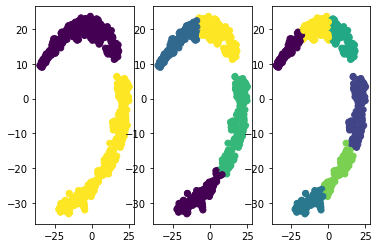

In [3]:
#  plot the cluster assignments as we want to see how the data is distributed among the clusters.
plt.figure()
plt.title('2,4, and 6 clusters')
for clusters in [2,4,6]:
  km = KMeans(n_clusters=clusters)
  preds = km.fit_predict(data)
  plt.subplot(1, 3, clusters/2)
  plt.scatter(*zip(*data), c= preds)
  classified = {x: {'m': 0, 'b': 0} for x in range(clusters)}
  for i in range(len(data)):
    cluster = preds[i]
    label= bc.target[i]
    label = 'm' if label == 0 else 'b'
    classified[cluster][label] = classified[cluster][label] + 1
  print('-'*40)
  for c in classified:
    print('Cluster %d. Malignant percentage: ' % c, end=' ')
    print(classified[c], end=' ')
    print('%.3f' % (classified[c]['m'] / (classified[c]['m'] + classified[c]['b'])))
  print(metrics.homogeneity_score(bc.target, preds))
  print(metrics.silhouette_score(data, preds))

We observe that the algorihm is able to separate the instances belonging to each class quite effectively even though it has no information about labels

Furthermore, we see that as we increase the number of clusters, the instances assigned to dominatly malignant or benign clusters does not increase but the regions are better eparated. 


This enables greater granularity and a more accurate prediction of probability that a selected instance belongs to either class.

There are also 2 metrics that can be used in order to determine cluster quality. For the data where the ground truth is know (essentially, labeled data), homogeneity measures the rate by which each cluster is dominated by a single clas.

For the data where the ground truth is unknown, the silhouette coefficient measures the intra-cluster cohensiveness and the inter-cluster separability. 